# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests, csv
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(weather_api_key)

5509164b94b4b417973a3882e28bc8b4


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
country_codes =[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.00, size=1500)
lat_lngs = zip(lats, lngs)
city = citipy

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [3]:
print(cities)

['hermanus', 'punta arenas', 'mar del plata', 'kavieng', 'barrow', 'port alfred', 'lompoc', 'lebu', 'esperance', 'rikitea', 'mitsamiouli', 'busselton', 'kaitangata', 'east london', 'cabo san lucas', 'nago', 'muzhi', 'bababe', 'jieshi', 'qaanaaq', 'cape town', 'albany', 'hilo', 'chokurdakh', 'cherskiy', 'chuy', 'nouadhibou', 'puerto ayora', 'tsihombe', 'lavrentiya', 'karratha', 'kapaa', 'waddan', 'fortuna', 'namibe', 'coihaique', 'colesberg', 'cayenne', 'hithadhoo', 'mmabatho', 'oranjemund', 'aklavik', 'warner robins', 'provideniya', 'vanavara', 'ushuaia', 'salalah', 'baculin', 'pacific grove', 'georgetown', 'hofn', 'lakatoro', 'kodiak', 'flinders', 'batagay', 'beloha', 'fort nelson', 'mataura', 'itarema', 'brae', 'dingle', 'nikolskoye', 'penzance', 'husavik', 'jamestown', 'arraial do cabo', 'longyearbyen', 'dikson', 'new norfolk', 'pevek', 'vila velha', 'the valley', 'itaituba', 'grimshaw', 'grand river south east', 'grand centre', 'bud', 'dauphin', 'teguise', 'vaini', 'saint-philippe'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Open Weather Map using API Key

# url = "http://maps.openweathermap.org/maps/2.0/weather/TA2/{z}/{x}/{y}&appid=" + weather_api_key
# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?q="

In [5]:
# Create a partial query URL
# query = f"{url}{city}&appid={weather_api_key}"
# api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}

In [6]:
# weather_response = requests.get(query)
# weather_json = weather_response.json()

In [7]:
# print(weather_json)

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Data list of Cities
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
date = []
counter = 0
record_counter = 0
setcount = 1


for city in cities:
    counter += 1
    if (counter % 50 == 0):
        setcount += 1
        record_counter =0
        print(setcount)
        print(record_counter)
        print(counter)
    record_counter += 1
    print("processing record" + str(record_counter) +"of Set" + str(setcount) +"|" +city)
    try: 
        weather_response = requests.get(f"{url}{city}&appid={weather_api_key}").json()
        city_list.append(weather_response['name'])
        lat_list.append(weather_response['coord']['lat'])
        lng_list.append(weather_response['coord']['lon'])
        max_temp_list.append(weather_response['main']['temp_max'])
        humidity_list.append(weather_response['main']['humidity'])
        cloudiness_list.append(weather_response['clouds']['all'])
        windspeed_list.append(weather_response['wind']['speed'])
    except:
        print("City Not Found, Pass...:" + city)

        
print(len(weather_response))      


processing record1of Set1|hermanus
processing record2of Set1|punta arenas
processing record3of Set1|mar del plata
processing record4of Set1|kavieng
processing record5of Set1|barrow
processing record6of Set1|port alfred
processing record7of Set1|lompoc
processing record8of Set1|lebu
processing record9of Set1|esperance
processing record10of Set1|rikitea
processing record11of Set1|mitsamiouli
processing record12of Set1|busselton
processing record13of Set1|kaitangata
processing record14of Set1|east london
processing record15of Set1|cabo san lucas
processing record16of Set1|nago
processing record17of Set1|muzhi
processing record18of Set1|bababe
City Not Found, Pass...:bababe
processing record19of Set1|jieshi
processing record20of Set1|qaanaaq
processing record21of Set1|cape town
processing record22of Set1|albany
processing record23of Set1|hilo
processing record24of Set1|chokurdakh
processing record25of Set1|cherskiy
processing record26of Set1|chuy
processing record27of Set1|nouadhibou
proce

processing record14of Set5|coquimbo
processing record15of Set5|san cristobal
processing record16of Set5|olafsvik
processing record17of Set5|asosa
processing record18of Set5|yeppoon
processing record19of Set5|zumpango
processing record20of Set5|norsup
processing record21of Set5|tura
processing record22of Set5|havoysund
processing record23of Set5|manta
processing record24of Set5|ruteng
processing record25of Set5|evensk
processing record26of Set5|attawapiskat
City Not Found, Pass...:attawapiskat
processing record27of Set5|aketi
processing record28of Set5|tuskegee
processing record29of Set5|saldanha
processing record30of Set5|aguimes
processing record31of Set5|shirgaon
processing record32of Set5|gongzhuling
processing record33of Set5|palmer
processing record34of Set5|waipawa
processing record35of Set5|ponta delgada
processing record36of Set5|vaitupu
City Not Found, Pass...:vaitupu
processing record37of Set5|quatre cocos
processing record38of Set5|padang
processing record39of Set5|bardiyah


processing record25of Set9|clive
processing record26of Set9|baruun-urt
processing record27of Set9|majengo
processing record28of Set9|jaipur hat
City Not Found, Pass...:jaipur hat
processing record29of Set9|ialibu
processing record30of Set9|maloy
processing record31of Set9|cordoba
processing record32of Set9|marquette
processing record33of Set9|ambikapur
processing record34of Set9|bambous virieux
processing record35of Set9|zhezkazgan
processing record36of Set9|scalea
processing record37of Set9|kathmandu
processing record38of Set9|ovre ardal
processing record39of Set9|cidreira
processing record40of Set9|isangel
processing record41of Set9|rio grande
processing record42of Set9|lahij
processing record43of Set9|shenjiamen
processing record44of Set9|tual
processing record45of Set9|acara
processing record46of Set9|necochea
processing record47of Set9|waterboro
processing record48of Set9|marcona
City Not Found, Pass...:marcona
processing record49of Set9|saint-francois
processing record50of Set9|g

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#Creating a DataFrame
city_data_pd = pd.DataFrame({"City":city_list,
                         "Lat":lat_list,
                         "Lng":lng_list,
                         "Max Temp":max_temp_list,
                         "Humidity":humidity_list,
                         "Cloudiness":cloudiness_list,
                         "Wind Speed":windspeed_list,
                            })

pd.DataFrame.to_csv(city_data_pd, 'city_data.csv')

# city_data_pd.head()
city_data_pd.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
dtype: int64

In [10]:
weather_dict = {"City":city_list,
                         "Lat":lat_list,
                         "Lng":lng_list,
                         "Max Temp":max_temp_list,
                         "Humidity":humidity_list,
                         "Cloudiness":cloudiness_list,
                         "Wind Speed":windspeed_list,
}

In [11]:
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,-34.4187,19.2345,288.04,86,100,7.32
1,Punta Arenas,-53.1500,-70.9167,279.88,79,100,4.51
2,Mar del Plata,-38.0023,-57.5575,284.33,62,0,1.34
3,Kavieng,-2.5744,150.7967,302.97,68,17,2.73
4,Barrow,71.2906,-156.7887,272.16,86,90,4.63


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

ValueError: Unrecognized marker style '0'

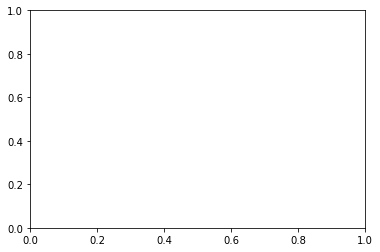

In [16]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], edgecolor="blue", linewidths=1, marker="0",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (05/19/2021)")
plt.savefig("Max_temp.png")

## Latitude vs. Humidity Plot

In [ ]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], edgecolor="blue", linewidths=1, marker="0",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (05/19/2021)")
plt.savefig("Humidity.png")

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression